# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student surname: Ghidoni

Student name: Rebecca
    
ID:2026709

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 2026709
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [66 61 59 63 58 72 45 72 51 53]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


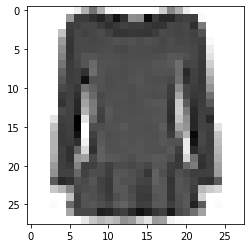

LABEL: 0
INPUT:


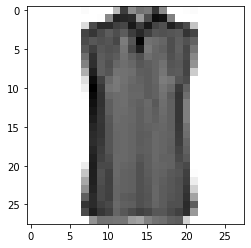

LABEL: 6
INPUT:


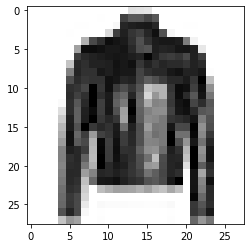

LABEL: 4
INPUT:


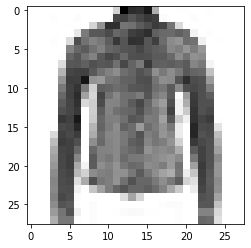

LABEL: 4


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

#train linear SVM
predic=SVC(kernel="poly",degree=1)
a=GridSearchCV(predic,parameters,cv=4)
a.fit(X_train,y_train)
# ADD YOUR CODE

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(a.best_params_)
print("Score with best parameters:")
# ADD YOUR CODE
print(a.best_score_)
print("All scores on the grid:")

dicti=a.cv_results_
print(dicti["split0_test_score"])
print(dicti["split1_test_score"])
print(dicti["split2_test_score"])
print(dicti["split3_test_score"])

# ADD YOUR CODE

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 10}
Score with best parameters:
0.7783333333333333
All scores on the grid:
[0.19333333 0.19333333 0.61333333 0.73333333 0.76666667 0.74666667]
[0.18       0.18       0.64666667 0.74666667 0.74       0.74666667]
[0.21333333 0.21333333 0.64666667 0.78       0.82666667 0.81333333]
[0.22       0.22       0.59333333 0.71333333 0.78       0.74666667]


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [9]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of degree 2 kernel

predic=SVC(kernel="poly",degree=2)
b=GridSearchCV(predic,parameters,cv=4)
b.fit(X_train,y_train)

# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(b.best_params_)
print("Score with best parameters:")
print(b.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:")

dicti=b.cv_results_
print(dicti["split0_test_score"])
print(dicti["split1_test_score"])
print(dicti["split2_test_score"])
print(dicti["split3_test_score"])
# ADD YOUR CODE

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found:
{'C': 0.05, 'gamma': 0.5}
Score with best parameters:
0.7466666666666667

All scores on the grid:
[0.69333333 0.70666667 0.70666667 0.71333333 0.70666667 0.70666667
 0.70666667 0.70666667 0.70666667]
[0.74       0.76       0.76       0.74666667 0.76       0.76
 0.76       0.76       0.76      ]
[0.78666667 0.79333333 0.79333333 0.79333333 0.79333333 0.79333333
 0.79333333 0.79333333 0.79333333]
[0.72666667 0.72666667 0.72666667 0.72       0.72666667 0.72666667
 0.72666667 0.72666667 0.72666667]


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 4th degree).

In [10]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 4

predic=SVC(kernel="poly",degree=4)
c=GridSearchCV(predic,parameters,cv=4)
c.fit(X_train,y_train)


# ADD YOUR CODE

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(c.best_params_)
print("Score with best parameters:")
print(c.best_score_)
# ADD YOUR CODE

print("\nAll scores on the grid:")
# ADD YOUR CODE
dicti=c.cv_results_
print(dicti["split0_test_score"])
print(dicti["split1_test_score"])
print(dicti["split2_test_score"])
print(dicti["split3_test_score"])

RESULTS FOR POLY DEGREE= 4  KERNEL
Best parameters set found:
{'C': 0.5, 'gamma': 0.05}
Score with best parameters:
0.7100000000000001

All scores on the grid:
[0.66666667 0.68666667 0.68666667 0.70666667 0.68666667 0.68666667
 0.69333333 0.68666667 0.68666667]
[0.71333333 0.71333333 0.71333333 0.70666667 0.71333333 0.71333333
 0.71333333 0.71333333 0.71333333]
[0.72666667 0.66666667 0.66666667 0.74666667 0.66666667 0.66666667
 0.66666667 0.66666667 0.66666667]
[0.66666667 0.68       0.68       0.68       0.68       0.68
 0.68       0.68       0.68      ]


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [11]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

predic=SVC(kernel="rbf")
d=GridSearchCV(predic,parameters,cv=4)
d.fit(X_train,y_train)



# ADD YOUR CODE

print ('RESULTS FOR rbf KERNEL')

print("Best parameters set found:")
# ADD YOUR CODE
print(d.best_params_)

print("Score with best parameters:")
# ADD YOUR CODE
print(d.best_score_)

print("\nAll scores on the grid:")
# ADD YOUR CODE

dicti=d.cv_results_
print(dicti["split0_test_score"])
print(dicti["split1_test_score"])
print(dicti["split2_test_score"])
print(dicti["split3_test_score"])

RESULTS FOR rbf KERNEL
Best parameters set found:
{'C': 5, 'gamma': 0.005}
Score with best parameters:
0.7949999999999999

All scores on the grid:
[0.69333333 0.70666667 0.12       0.12       0.77333333 0.74666667
 0.15333333 0.12       0.76       0.74666667 0.15333333 0.12
 0.76       0.74666667 0.15333333 0.12      ]
[0.70666667 0.68       0.12666667 0.12       0.78       0.73333333
 0.15333333 0.12       0.76666667 0.73333333 0.15333333 0.12
 0.76666667 0.73333333 0.15333333 0.12      ]
[0.73333333 0.72       0.12       0.12       0.82       0.75333333
 0.14666667 0.12       0.82       0.75333333 0.14666667 0.12
 0.82       0.75333333 0.14666667 0.12      ]
[0.7        0.68       0.14       0.12666667 0.80666667 0.76
 0.16       0.12666667 0.78666667 0.76       0.16       0.12666667
 0.78666667 0.76       0.16       0.12666667]


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

I can  see that, increasing the degree of the polynomial kernel, the score decrease. But the 'rbf' model seemes to be the best method to describe data.

## TO DO 5
Report here the best SVM kernel and parameters

In [12]:
#get training and test error for the best SVM model from CV
best_SVM =  {'C': [50],'gamma':[0.05]}# USE YOUR OPTIMAL PARAMETERS

# ADD YOUR CODE

e=SVC(kernel='rbf',C=5,gamma=0.005)
e.fit(X_train,y_train)
#print(e.fit(X_test,y_test))
# ADD YOUR CODE

# (error is 1 - svm.score)
test_error= 1 - e.score(X_test,y_test)


train_error=1-e.score(X_train,y_train)
print ("Best SVM training error: %f" % train_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.197500
Best SVM test error: 0.197500


## TO DO 6

Analyze how the classification boundaries depend on the C parameter

In [13]:
# Function to plot the data and classification boundaries. 


def plot_data(model, X_train, y_train, X_test, y_test):

    def make_meshgrid(x, y, h=.02):
        x_min, x_max = x.min() - abs(0.1*x.min()), x.max() + abs(0.1*x.min())
        y_min, y_max = y.min() - abs(0.1*y.min()), y.max() + abs(0.1*y.min())
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        return xx, yy

    def plot_contours(ax, clf, xx, yy, **params):
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        out = ax.contourf(xx, yy, Z, **params)
        return out
    
    
    
    # Plot
    fig, ax = plt.subplots(1,2,figsize=(15,5))

    # Training set
    X0, X1 = X_train_pca[:, 0], X_train_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[0], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[0].scatter(X0, X1, c=y_train, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[0].set_xticks(())
    ax[0].set_yticks(())
    train_error=1-model.score(X_train,y_train)
    ax[0].set_title('Training data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],train_error))
    
    # Test set
    X0, X1 = X_test_pca[:, 0], X_test_pca[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax[1], model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax[1].scatter(X0, X1, c=y_test, cmap=plt.cm.coolwarm, s=35, edgecolors='k')
    ax[1].set_xticks(())
    ax[1].set_yticks(())
    test_error=1-model.score(X_test,y_test)
    ax[1].set_title('Test data, C={:.0e}, model accuracy={:.3f}'.format(model.__dict__['C'],test_error))
    
    plt.show()

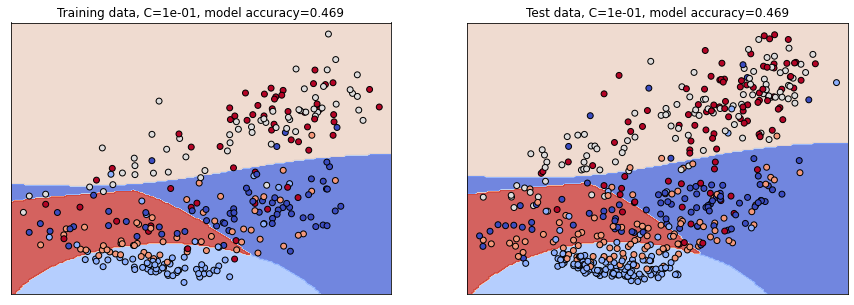

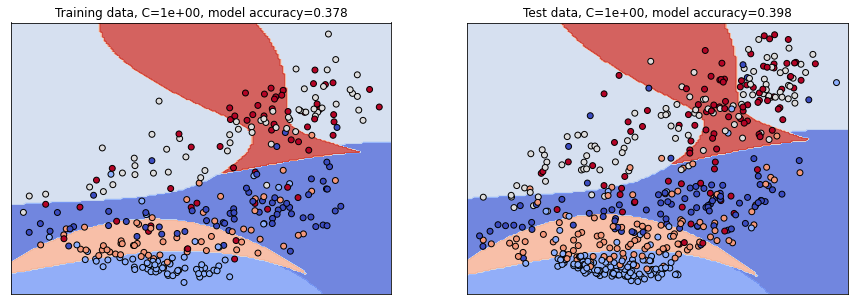

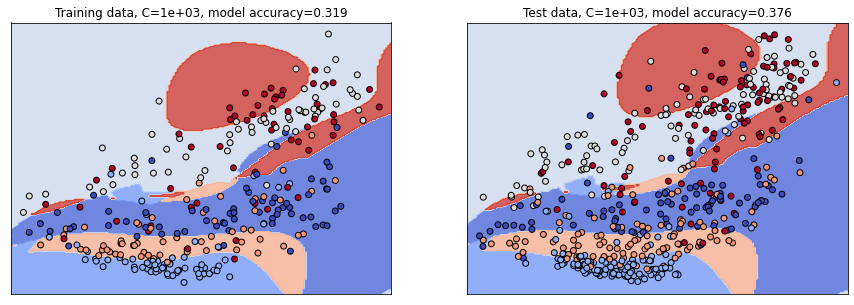

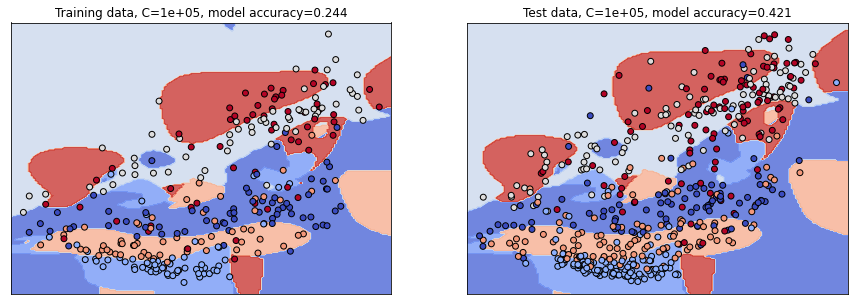

In [14]:
# Too many test samples for visualization, plot only some of them
m_test = 1000
p = np.random.permutation(X_test.shape[0])[:m_test]
X_test_red, y_test_red = X_test[p,:], y_test[p]

# Perform classification only on subset of original classes for better visualization

class_list = [0,1,2,3,4] #YOU CAN TRY TO CHANGE THE CLASSES

train_idxs = [i for i in range(len(y_train)) if y_train[i] in class_list]   
test_idxs = [i for i in range(len(y_test_red)) if y_test_red[i] in class_list] 
X_train_plot = X_train[train_idxs,:]
X_test_plot = X_test_red[test_idxs,:] 
y_train_plot = y_train[train_idxs]
y_test_plot = y_test_red[test_idxs] 


# The dimensionality is reduced to 2 for visualization using PCA
# PCA: Reduce the dimensionality trying to preserve the information content. 
# PCA will be the topic of one of the very last lectures

# Reduce X dimensionality to 2 for visualization
pca = PCA(n_components=2, svd_solver='randomized', whiten=True).fit(X_train)
X_train_pca, X_test_pca = pca.transform(X_train_plot), pca.transform(X_test_plot)


C_list = [1e-1, 1, 1e3, 1e5]
gamma = 0.5

# Fit the prediction model on train_plot data futher reduced with PCA, 
# then classify with different prediction models and plot data
# Use RBF kernel 

for C in C_list:
    
    ##parameters={'C': [C],'gamma':[0.5]}
    my_svm = SVC(kernel="rbf",C=C,gamma=0.5)
    
    # ADD CODE TO TRAIN SVM (use the PCA reduced data)
    my_svm.fit(X_train_pca,y_train_plot)
    
    
    plot_data(my_svm, X_train_pca, y_train_plot, X_test_pca, y_test_plot)

## QUESTION 2
How do the shape of the boundaries changes when trying different values of C ?

Increasing C the boundaries change becoming more and more complex

## TO DO 7

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [15]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


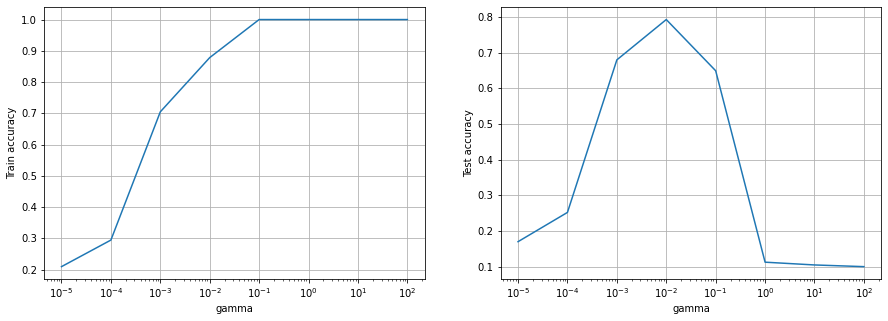

In [16]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for gamma in gamma_values:
    My_svm = SVC(kernel="rbf",C=1.0,gamma=gamma)
    My_svm.fit(X_train,y_train)
    train_acc=My_svm.score(X_train,y_train)
    test_acc=My_svm.score(X_test,y_test)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)



# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 3
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

The train error increases when gamma increases. But the test accuracy has a maximum for gamma = 10^(-2). If we use a bigger gamma we overfit the training data, if we use a smaller gamma we underfit it. So the best value for gamma is 10^(-2)

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [17]:
X = X[permutation]
y = y[permutation]

m_training = 1500 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)
#print(freqs.sum())

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [155 133 146 135 162 158 160 146 163 142]


## TO DO 8

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  1500$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [18]:
#get training and test error for the best SVM model from CV

# ADD YOUR CODE

#parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

#run SVM with rbf kernel

f=SVC(kernel="rbf",C=5,gamma=0.005)
#f=GridSearchCV(predic,parameters,cv=4)
f.fit(X_train,y_train)



# ADD YOUR CODE

 
training_error=1-f.score(X_train,y_train)
test_error= 1-f.score(X_test,y_test)
print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)


Best SVM training error: 0.065333
Best SVM test error: 0.170068


Just for comparison, let's also use logistic regression 

## TO DO 9 Try first without regularization (use a very large large C)¶

In [19]:
from sklearn import linear_model


h=linear_model.LogisticRegression(C=100)
j=h.fit(X_train,y_train)
# ADD YOUR CODE
train_error=1-j.score(X_train,y_train)

test_error=1-j.score(X_test,y_test)


print ("Best logistic regression training error: %f" % train_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.210137


/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## TO DO 10 Try  with regularization (use C=1)¶

In [20]:
# ADD YOUR CODE


k=linear_model.LogisticRegression(C=1.0)
l=k.fit(X_train,y_train)
# ADD YOUR CODE
train_error=1-k.score(X_train,y_train)

test_error=1-k.score(X_test,y_test)



print ("Best regularized logistic regression training error: %f" % train_error)
print ("Best regularized logistic regression test error: %f" % test_error)

Best regularized logistic regression training error: 0.012000
Best regularized logistic regression test error: 0.190530


/Users/ghidoni/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## QUESTION 4
Compare and discuss:
- the results from SVM with m=600 and with m=1500 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

Using 1500 gives a better accurancy for the SVM method. 
SVM is  more accurate than the logistic regression, but also more slow.

## TO DO 11
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

INPUT:


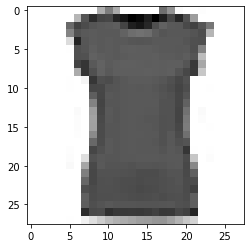

LABEL: 0


In [21]:
LR_prediction = k.predict(X_test)
SVM_prediction = f.predict(X_test)

for i in range(len(SVM_prediction)):
    if SVM_prediction[i]==y_test[i] and LR_prediction[i]!=y_test[i]:
        #if LR_prediction[i]!=y_test[i]:
        plot_input(X_train,y_train,i)
        break



## TO DO 12
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [22]:
from sklearn.metrics import confusion_matrix

In [23]:

np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = confusion_matrix(y_test,SVM_prediction,labels=u)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR =  confusion_matrix(y_test,LR_prediction,labels=u)

print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5845 5867 5854 5865 5838 5842 5840 5854 5837 5858]

 Confusion matrix SVM  
 
 [[4842    7   82  413   21    3  404    0   69    4]
 [  28 5490   71  261    4    1    9    0    3    0]
 [  94    2 4270   62  772    6  580    0   68    0]
 [ 227   25   52 5158  201    0  176    0   26    0]
 [  13   11  504  308 4402    3  569    0   27    1]
 [   5    0    1    1    2 5181    2  382   31  237]
 [1102    5  707  234  706    4 2963    0  117    2]
 [   0    0    0    0    0  294    0 5202   12  346]
 [  22    6   35   33   27   33  119   20 5533    9]
 [   0    0    0    2    1   80    0  260    5 5510]]

 Confusion matrix SVM (normalized)   
 
 [[0.83 0.   0.01 0.07 0.   0.   0.07 0.   0.01 0.  ]
 [0.   0.94 0.01 0.04 0.   0.   0.   0.   0.   0.  ]
 [0.02 0.   0.73 0.01 0.13 0.   0.1  0.   0.01 0.  ]
 [0.04 0.   0.01 0.88 0.03 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.09 0.05 0.75 0.   0.1  0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.89 0.   0.07 0.0

In [24]:
# ADD CODE TO NORMALIZE CONFUSION MATRIX AND PRINT THE NORMALIZED MATRIX

## QUESTION 5
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


Probably some classes have lower accuracies than others because they are more similar. For example ankle boots are the most easily separable because they are different from every other category while t-shirt and shirt are more similar and so the confusion index for this categories is bigger.